# additional_ image looping

In [1]:
# Setting up enviornment
from base64 import b64decode
from pathlib import Path
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = 'your own key'

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
)

In [2]:
def sd_img2img_generate(prompt_text,input_img):
   
    answers = stability_api.generate(
        prompt=prompt_text,
        init_image=input_img, 
        steps=15, 
        width=512, 
        height=512,
    )

    for resp in answers:
        for artifact in resp.artifacts:
            if artifact.type == generation.ARTIFACT_IMAGE:
                img = Image.open(io.BytesIO(artifact.binary))
    return img

Let's start generate image from a text

In [3]:
# create a directory (folder) to store new image
imageDir = Path.cwd() / "imageLoop"
imageDir.mkdir(parents=True, exist_ok=True)

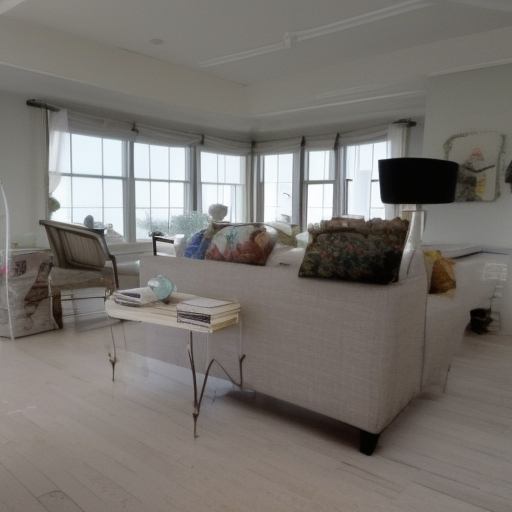

In [4]:
init_img = Image.open(imageDir / "init.png")
display(init_img)

now generating image number: 0


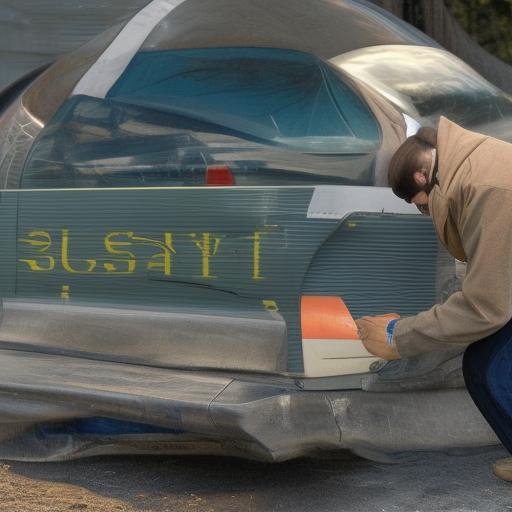

now generating image number: 1
now generating image number: 2
now generating image number: 3
now generating image number: 4
now generating image number: 5
now generating image number: 6
now generating image number: 7
now generating image number: 8
now generating image number: 9
now generating image number: 10


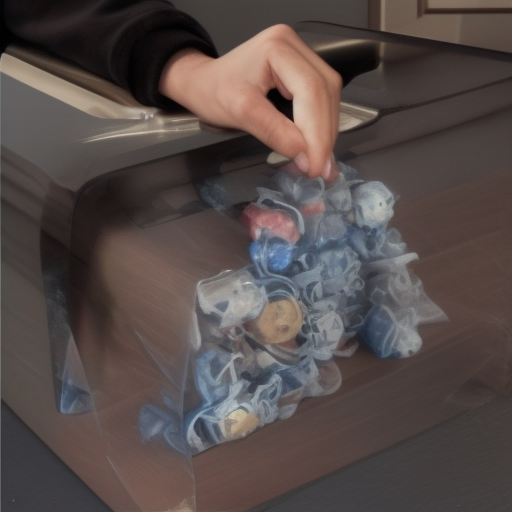

now generating image number: 11
now generating image number: 12
now generating image number: 13
now generating image number: 14
now generating image number: 15
now generating image number: 16
now generating image number: 17
now generating image number: 18
now generating image number: 19
now generating image number: 20


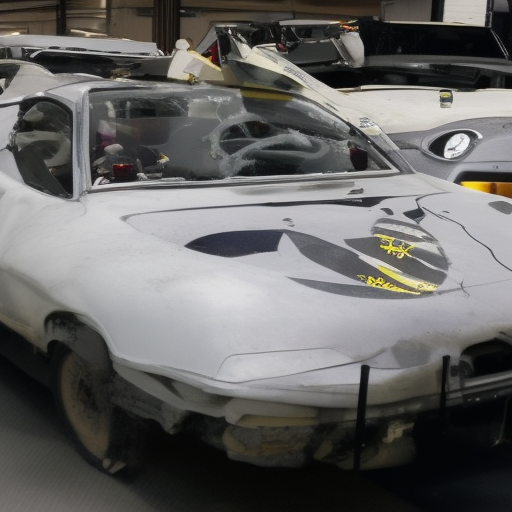

now generating image number: 21
now generating image number: 22
now generating image number: 23
now generating image number: 24
now generating image number: 25
now generating image number: 26
now generating image number: 27
now generating image number: 28
now generating image number: 29
now generating image number: 30


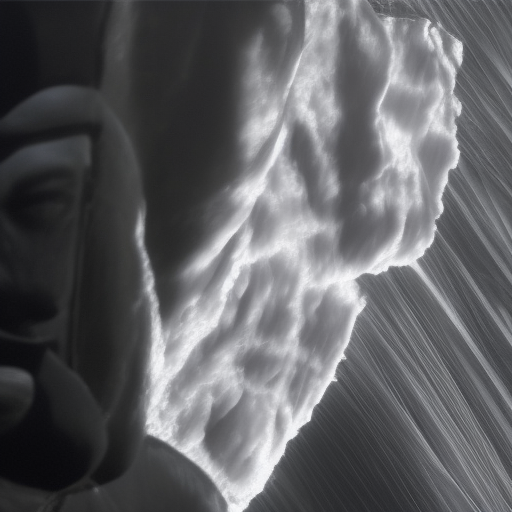

now generating image number: 31
now generating image number: 32
now generating image number: 33
now generating image number: 34
now generating image number: 35
now generating image number: 36
now generating image number: 37
now generating image number: 38
now generating image number: 39
now generating image number: 40


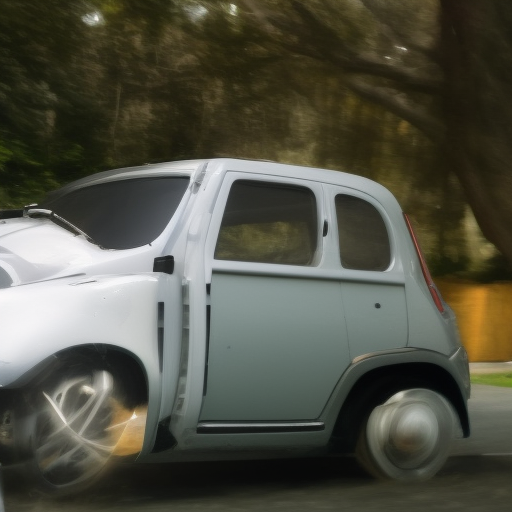

now generating image number: 41
now generating image number: 42
now generating image number: 43
now generating image number: 44
now generating image number: 45
now generating image number: 46
now generating image number: 47
now generating image number: 48
now generating image number: 49
now generating image number: 50


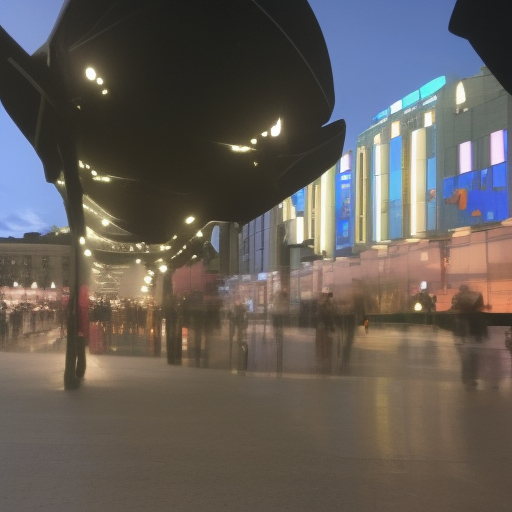

now generating image number: 51
now generating image number: 52
now generating image number: 53
now generating image number: 54
now generating image number: 55
now generating image number: 56
now generating image number: 57
now generating image number: 58
now generating image number: 59
now generating image number: 60


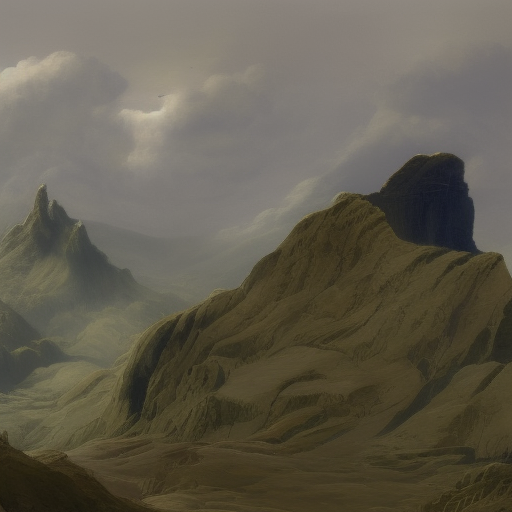

now generating image number: 61
now generating image number: 62
now generating image number: 63
now generating image number: 64
now generating image number: 65
now generating image number: 66
now generating image number: 67
now generating image number: 68
now generating image number: 69
now generating image number: 70


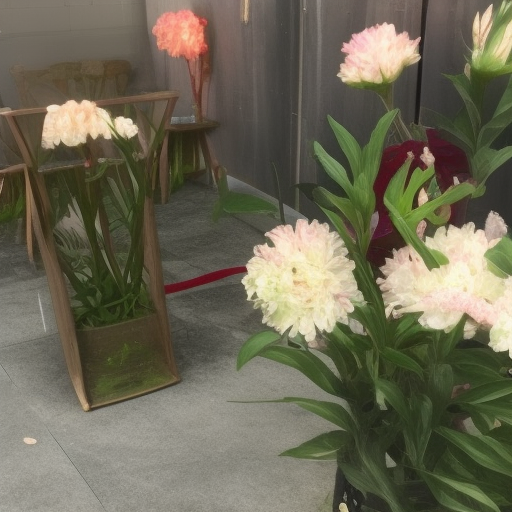

now generating image number: 71
now generating image number: 72
now generating image number: 73
now generating image number: 74
now generating image number: 75
now generating image number: 76
now generating image number: 77
now generating image number: 78
now generating image number: 79
now generating image number: 80


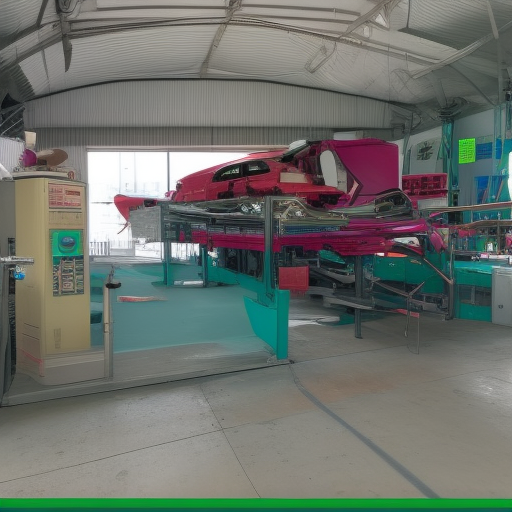

now generating image number: 81
now generating image number: 82
now generating image number: 83
now generating image number: 84
now generating image number: 85
now generating image number: 86
now generating image number: 87
now generating image number: 88
now generating image number: 89
now generating image number: 90


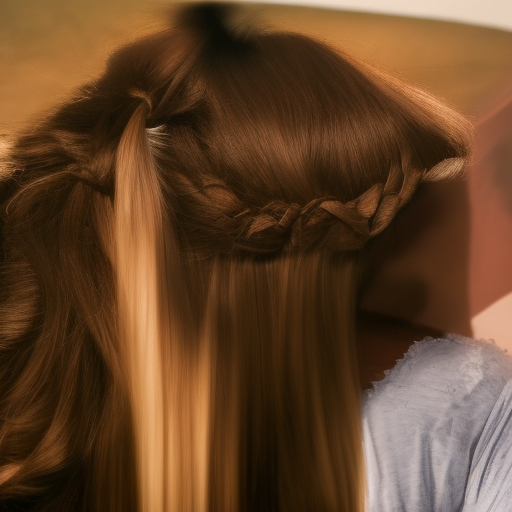

now generating image number: 91
now generating image number: 92
now generating image number: 93
now generating image number: 94
now generating image number: 95
now generating image number: 96
now generating image number: 97
now generating image number: 98
now generating image number: 99


In [5]:
# loop it for 100 times!!

# no input prompt
img = sd_img2img_generate("",init_img)

for i in range(100):
    print("now generating image number: " + str(i))
    img = sd_img2img_generate("",img)
    if(i%10==0):
        # save only every ten image
        image_file = imageDir / (str(i)+'.png')
        img.save(image_file) 
        display(img)    